<a href="https://colab.research.google.com/github/colincockburn/CISC_473_project/blob/main/image_restoration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
import yaml
import os
from dotenv import load_dotenv

load_dotenv()

REPO_DIR = os.getenv("REPO_DIR")

sys.path.append(REPO_DIR)
from src.data import Div2kDataSet

with open(f"{REPO_DIR}/configs/default.yaml", "r") as f:
    cfg = yaml.safe_load(f)



In [7]:
data_root = os.getenv("DATA_ROOT")
ds_train = Div2kDataSet(root=data_root, split="train", patch_size=128, sigma=25, augment=True)
ds_val = Div2kDataSet(root=data_root, split="valid", patch_size=128, sigma=25, augment=False)
print("Total train images:", len(ds_train)) # 800
print("Total val images:", len(ds_val))     # 100


Total train images: 800
Total val images: 100


In [8]:
import torch
from torch.utils.data import DataLoader
# test data pipeline
loader = DataLoader(ds_train, batch_size=cfg["data"]["batch_size"], shuffle=True)
xb, yb = next(iter(loader))
print("output:   batch:", xb.shape, yb.shape, "nan?", torch.isnan(xb).any().item(), "inf?", torch.isinf(xb).any().item())


output:   batch: torch.Size([16, 3, 128, 128]) torch.Size([16, 3, 128, 128]) nan? False inf? False


In [9]:
# Item Sanity
ds = Div2kDataSet(root=data_root, split="train", patch_size=128, sigma=25, augment=True)
noisy, clean = ds[0]
print("shapes:", noisy.shape, clean.shape)     # (3,128,128)
print("ranges:", (float(noisy.min()), float(noisy.max())),
                 (float(clean.min()), float(clean.max())))
print("noise mean abs:", float((noisy-clean).abs().mean()))


shapes: torch.Size([3, 128, 128]) torch.Size([3, 128, 128])
ranges: (0.0, 1.0) (0.03921568766236305, 0.9333333373069763)
noise mean abs: 0.07779642939567566


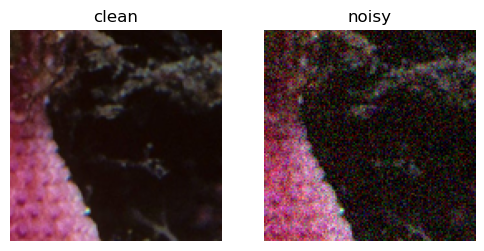

In [10]:
# visual sanity check
import matplotlib.pyplot as plt
def show(t, title): plt.imshow(t.permute(1,2,0).numpy()); plt.title(title); plt.axis('off')
noisy, clean = ds[0]
plt.figure(figsize=(6,3)); plt.subplot(1,2,1); show(clean,"clean")
plt.subplot(1,2,2); show(noisy,"noisy"); plt.show()
